<a href="https://colab.research.google.com/github/SamDarkKnight/EDA-PROJECT/blob/main/22BDS0413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv"
df = pd.read_csv(url)

df.head()

rownames  Anger Gender         item     resp  id  btype   situ  mode r2
0         1     20      M  S1WantCurse       no   1  curse  other  want  N
1         2     11      M  S1WantCurse       no   2  curse  other  want  N
2         3     17      F  S1WantCurse  perhaps   3  curse  other  want  Y
3         4     21      F  S1WantCurse  perhaps   4  curse  other  want  Y
4         5     17      F  S1WantCurse  perhaps   5  curse  other  want  Y

In [5]:
df.tail()

rownames  Anger Gender       item resp   id  btype  situ mode r2
7579      7580     17      M  S4DoShout   no  312  shout  self   do  N
7580      7581     20      F  S4DoShout   no  313  shout  self   do  N
7581      7582     25      F  S4DoShout   no  314  shout  self   do  N
7582      7583     23      F  S4DoShout   no  315  shout  self   do  N
7583      7584     12      F  S4DoShout   no  316  shout  self   do  N

In [6]:
print("Dimensions (rows, columns):", df.shape)

Dimensions (rows, columns): (7584, 10)


In [7]:
print("\n=== Summary Statistics ===")
print(df.describe(include='all'))


=== Summary Statistics ===
           rownames        Anger Gender         item  resp         id  btype  \
count   7584.000000  7584.000000   7584         7584  7584  7584.0000   7584   
unique          NaN          NaN      2           24     3        NaN      3   
top             NaN          NaN      F  S1WantCurse    no        NaN  curse   
freq            NaN          NaN   5832          316  3973        NaN   2528   
mean    3792.500000    20.003165    NaN          NaN   NaN   158.5000    NaN   
std     2189.456554     4.841139    NaN          NaN   NaN    91.2269    NaN   
min        1.000000    11.000000    NaN          NaN   NaN     1.0000    NaN   
25%     1896.750000    17.000000    NaN          NaN   NaN    79.7500    NaN   
50%     3792.500000    19.000000    NaN          NaN   NaN   158.5000    NaN   
75%     5688.250000    23.000000    NaN          NaN   NaN   237.2500    NaN   
max     7584.000000    39.000000    NaN          NaN   NaN   316.0000    NaN   

         si

In [8]:
#finding data types
print("\nData Types:\n", df.dtypes)


Data Types:
 rownames     int64
Anger        int64
Gender      object
item        object
resp        object
id           int64
btype       object
situ        object
mode        object
r2          object
dtype: object


In [9]:
#finding missing values
Missing_Values =df.isnull().sum()
print(Missing_Values)

rownames    0
Anger       0
Gender      0
item        0
resp        0
id          0
btype       0
situ        0
mode        0
r2          0
dtype: int64


In [10]:
#counting no of unique values
print("\nUnique Values per Column:\n", df.nunique())


Unique Values per Column:
 rownames    7584
Anger         26
Gender         2
item          24
resp           3
id           316
btype          3
situ           2
mode           2
r2             2
dtype: int64


In [14]:
#To fill missing values with mode
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [15]:
# Remove duplicates
df = df.drop_duplicates()

In [17]:
print("\n=== Mean, Median, Mode for Numerical Columns ===")

# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Filter out unwanted columns if present
num_cols_filtered = [col for col in num_cols if col not in ["rownames", "Person_ID"]]

for col in num_cols_filtered:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = list(df[col].mode())
    print(f"\nColumn: {col}")
    print(f"  Mean  : {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode  : {mode_val}")


=== Mean, Median, Mode for Numerical Columns ===

Column: Anger
  Mean  : 20.003164556962027
  Median: 19.0
  Mode  : [19]

Column: id
  Mean  : 158.5
  Median: 158.5
  Mode  : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,

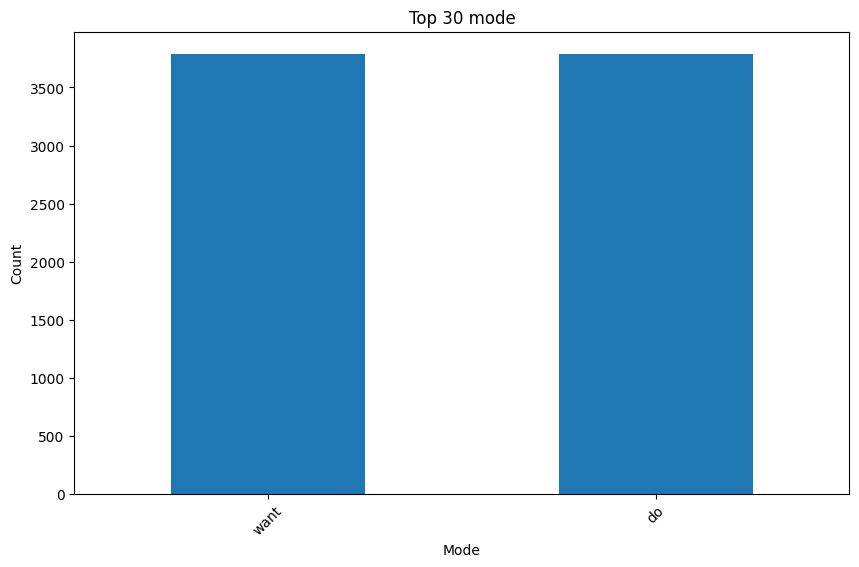

In [20]:
col = "mode"
df[col].value_counts().nlargest(30).plot(kind='bar', figsize=(10, 6))
plt.title(f"Top 30 {col}")
plt.ylabel("Count")
plt.xlabel(col.capitalize())
plt.xticks(rotation=45)
plt.show()


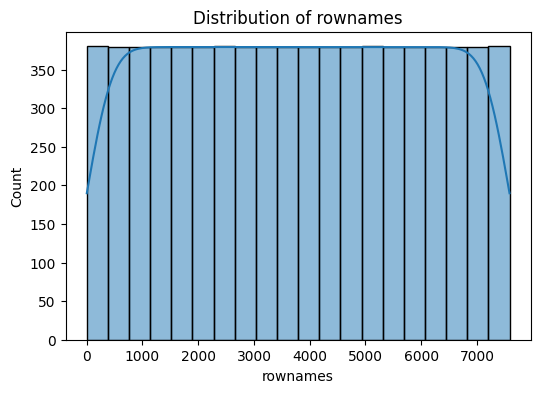

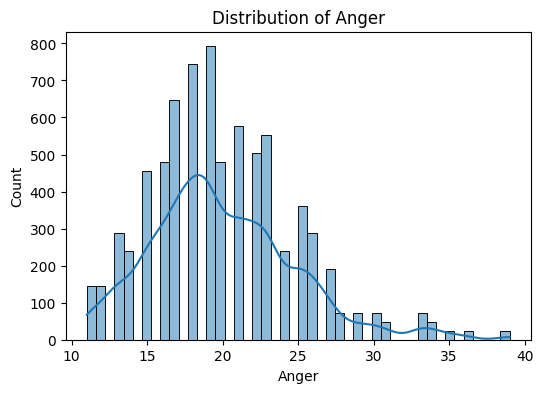

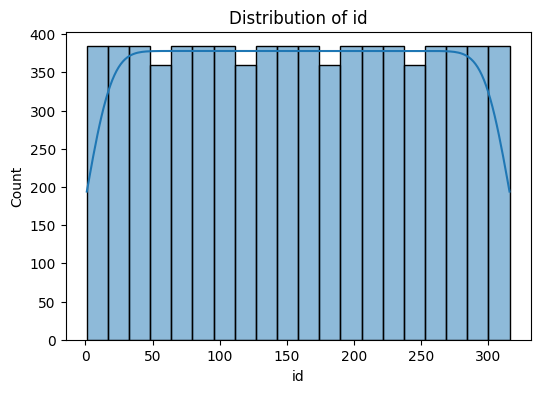

In [21]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

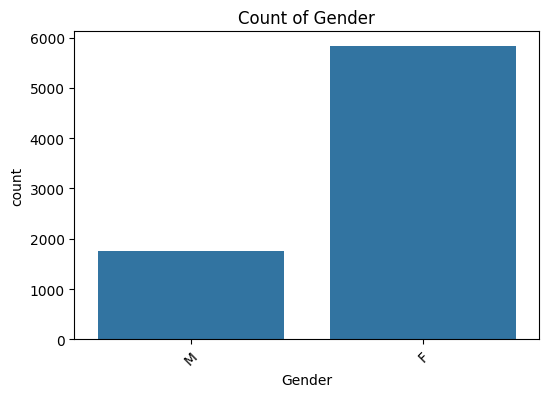

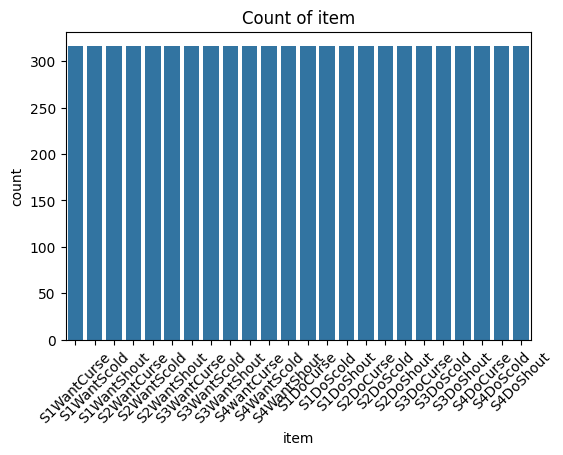

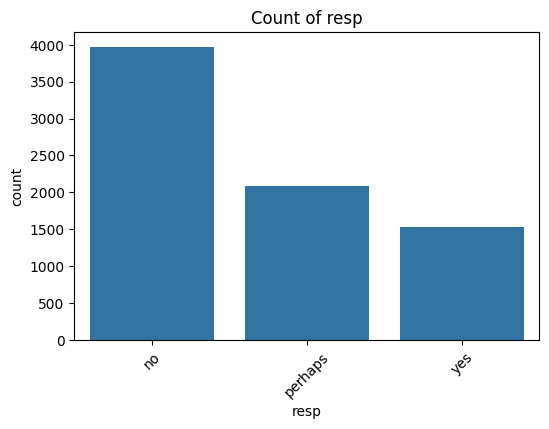

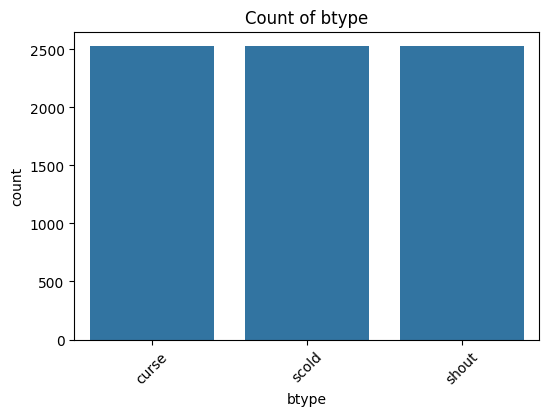

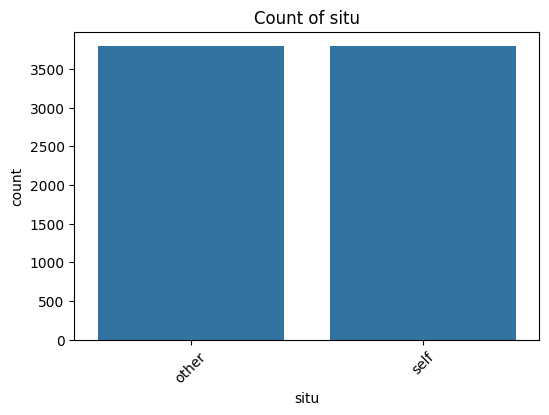

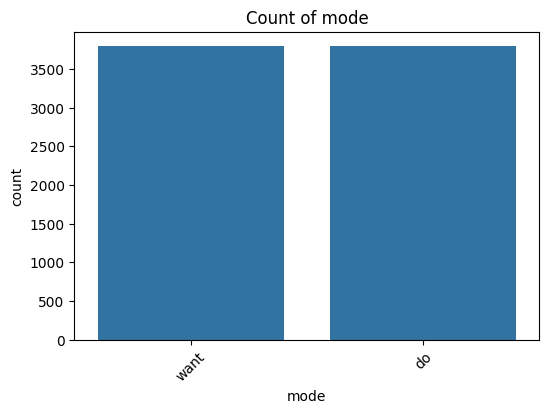

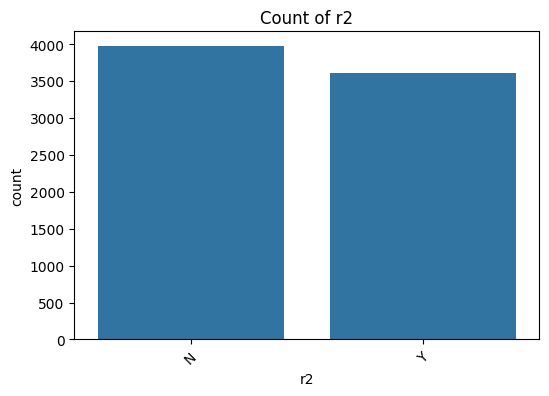

In [22]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

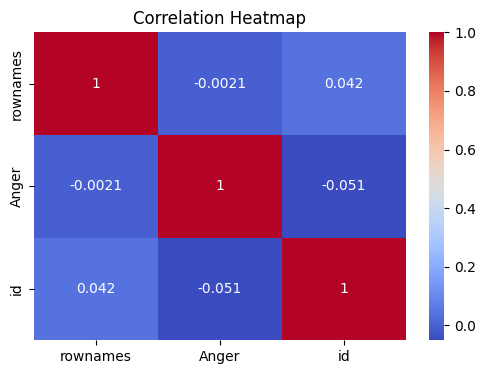

In [23]:
#Bivariate analysis
plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

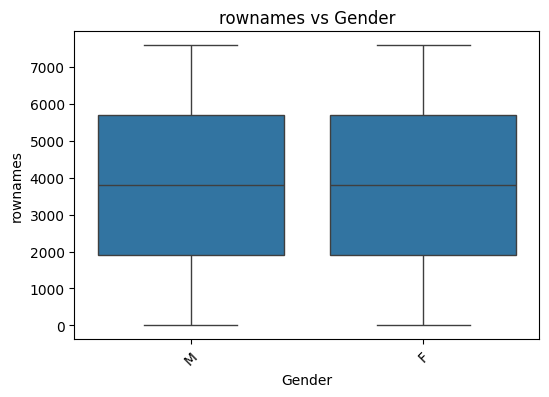

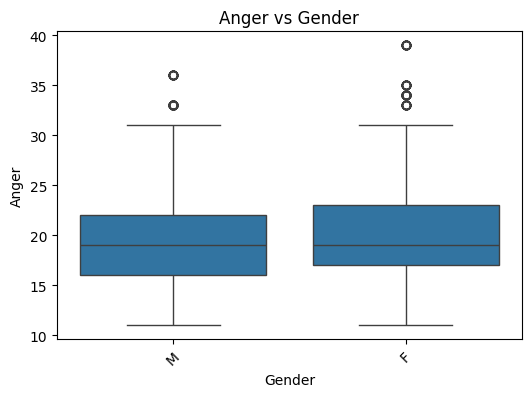

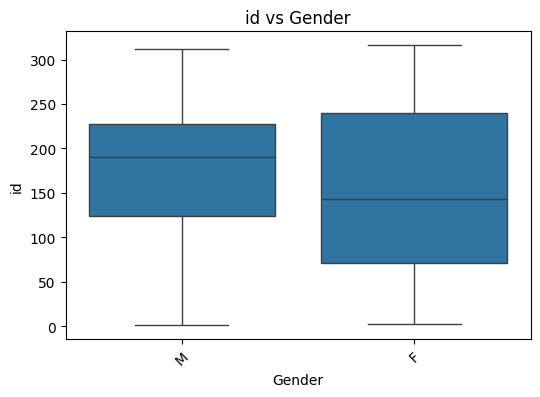

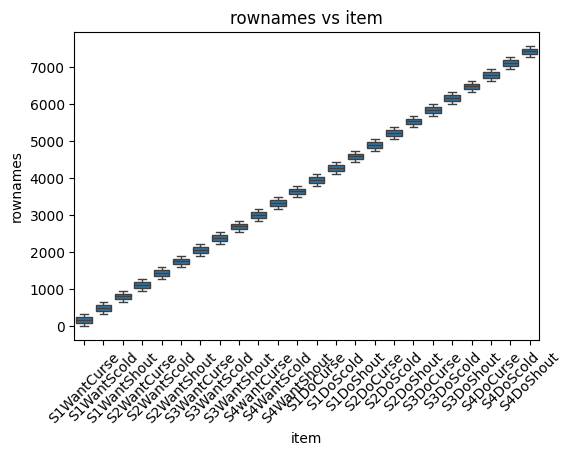

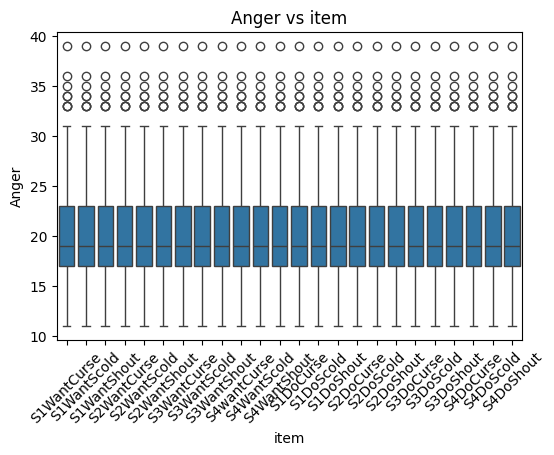

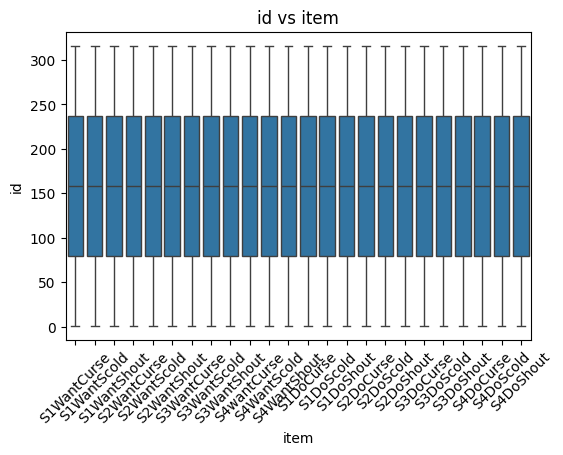

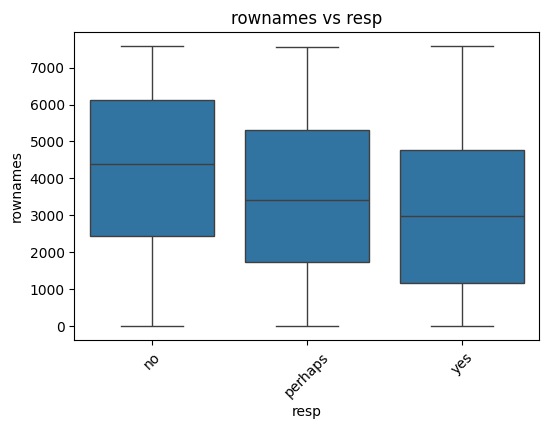

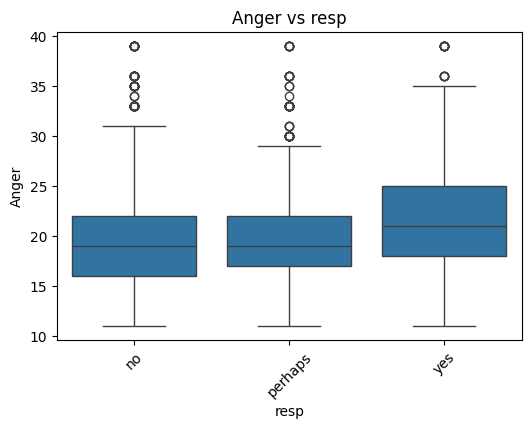

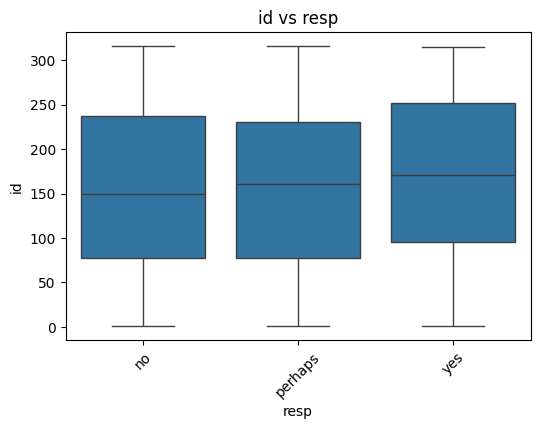

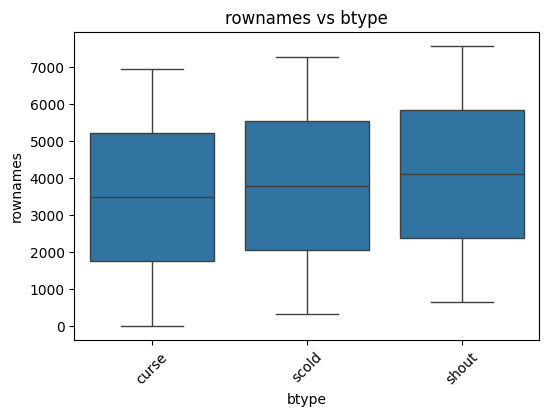

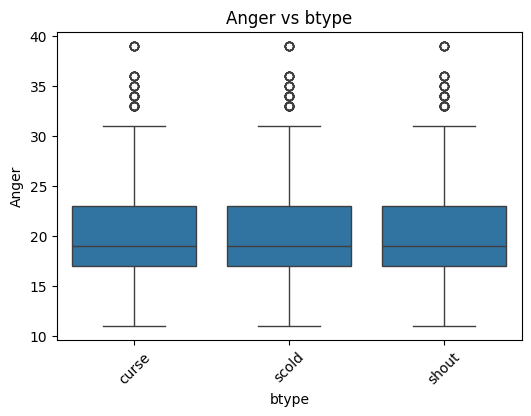

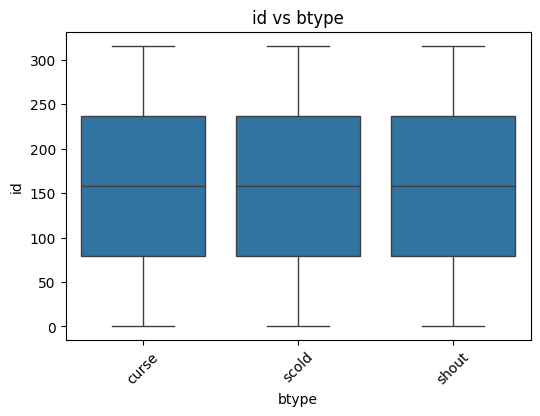

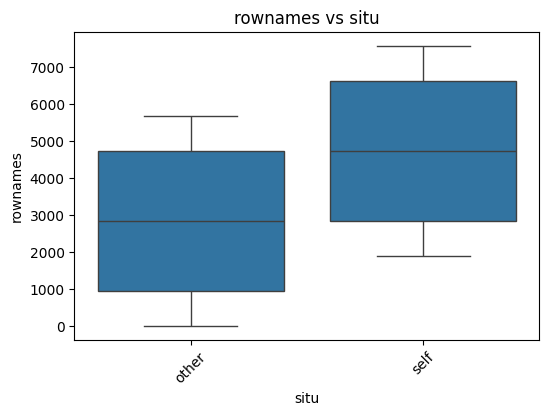

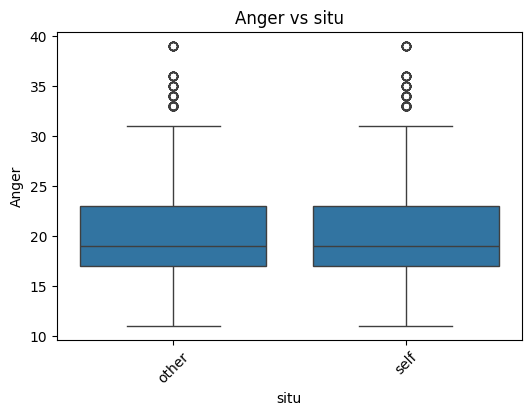

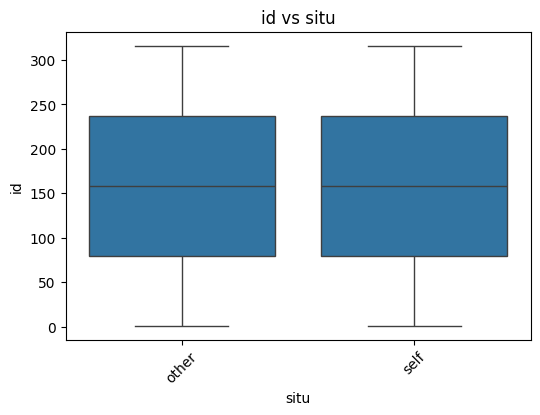

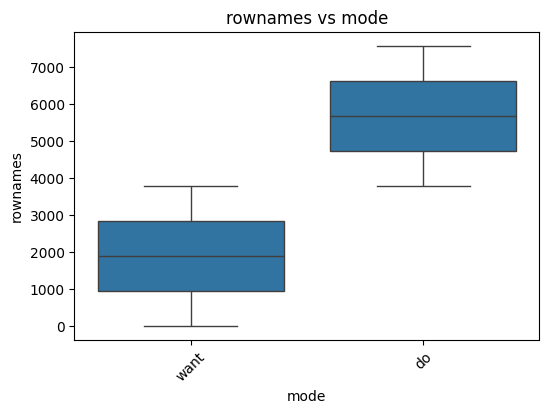

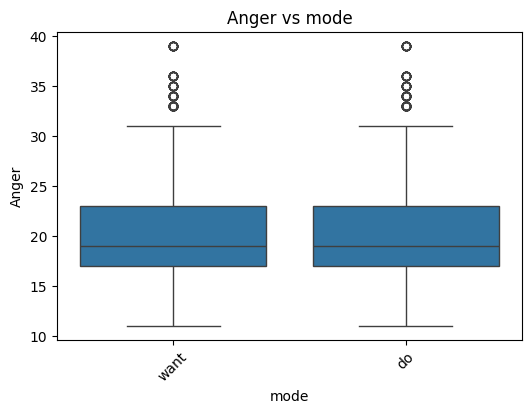

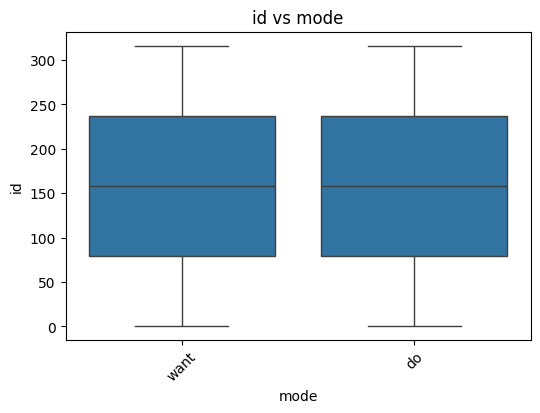

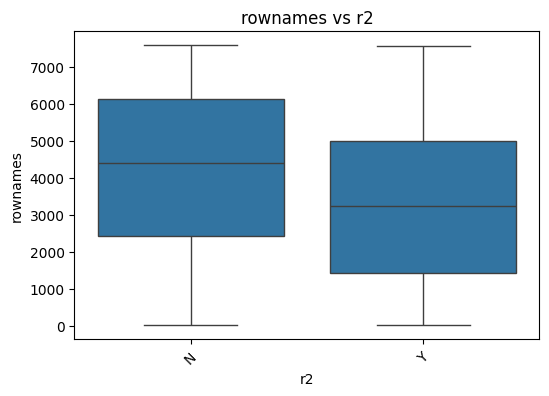

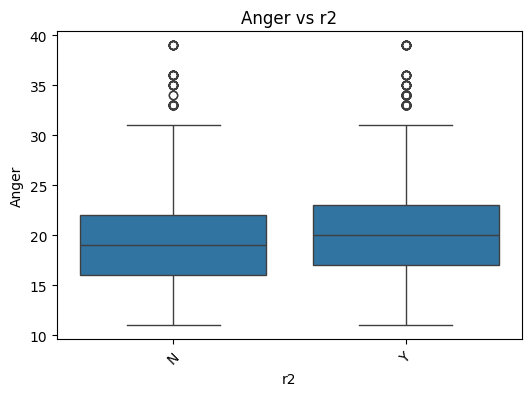

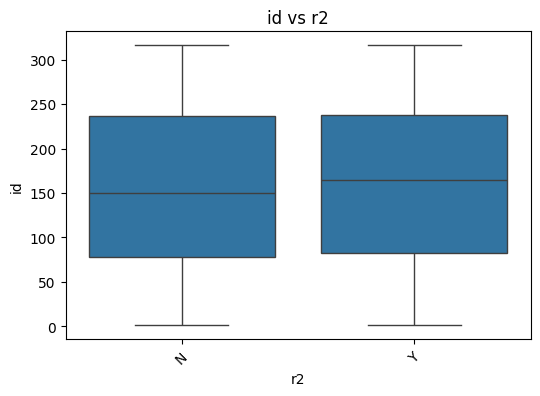

In [24]:
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col, y=num)
        plt.title(f"{num} vs {col}")
        plt.xticks(rotation=45)
        plt.show()

In [25]:
if len(cat_cols) > 0 and len(num_cols) > 0:
    grouped = df.groupby(cat_cols[0])[num_cols].mean()
    print("\nGroup-wise Mean:\n", grouped)


Group-wise Mean:
            rownames      Anger          id
Gender                                    
F       3787.049383  20.053498  153.049383
M       3810.643836  19.835616  176.643836


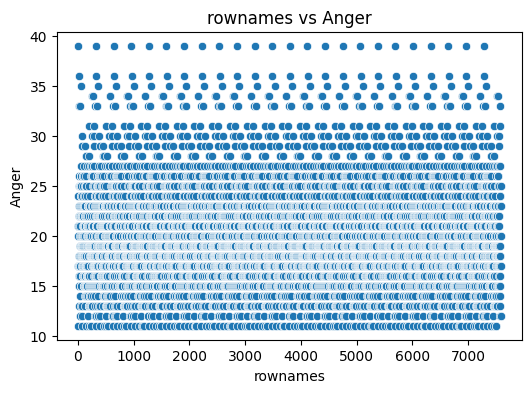

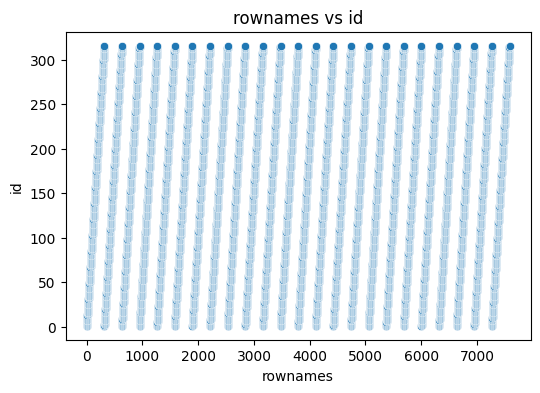

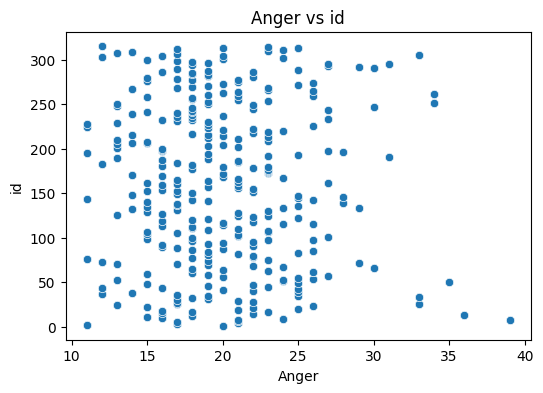

In [26]:
from itertools import combinations

num_pairs = list(combinations(num_cols, 2))  # All unique column pairs

for col_x, col_y in num_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col_x, y=col_y)
    plt.title(f"{col_x} vs {col_y}")
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()

In [27]:
if len(cat_cols) > 0 and len(num_cols) > 0:
    grouped = df.groupby(cat_cols[0])[num_cols].mean()
    print("\nGroup-wise Mean:\n", grouped)


Group-wise Mean:
            rownames      Anger          id
Gender                                    
F       3787.049383  20.053498  153.049383
M       3810.643836  19.835616  176.643836
